# <b>Question 10 - Geometric Transformations</b>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

### <b>Part 1</b>

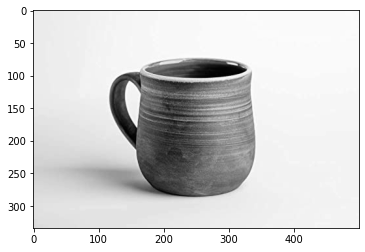

In [2]:
inp = cv2.imread("images/cup.jpg")
inp = cv2.cvtColor(inp,cv2.COLOR_BGR2RGB)
# plt.imshow(inp)
cer = cv2.cvtColor(inp,cv2.COLOR_RGB2GRAY)
plt.imshow(cer,cmap='gray')

### Theory
The rotation can be described by the rotation matrix:
$$R = 
\left(\begin{array}{cc} 
cos(\alpha) & -sin(\alpha)\\
sin(\alpha) & cos(\alpha)
\end{array}\right)
$$ 
On substitution:
$$\left(\begin{array}{cc} 
x^{'}\\
y^{'}\\
\end{array}\right) = 
\left(\begin{array}{cc} 
cos(\alpha) & -sin(\alpha)\\
sin(\alpha) & cos(\alpha)
\end{array}\right)
\left(\begin{array}{cc} 
x\\
y
\end{array}\right)
$$ 

In [3]:
def padding(img,k):
    padNum = math.floor(k/2)
    imgP = np.zeros((img.shape[0]+(2*padNum),img.shape[1]+(2*padNum)))
#     print(imgP.shape)
    imgP[padNum:imgP.shape[0]-padNum, padNum:imgP.shape[1]-padNum] = img
    xStart = padNum
    xEnd = imgP.shape[0]-padNum
    yStart = padNum
    yEnd = imgP.shape[1]-padNum
#     print(img.shape)
    imgP[xStart:xEnd, yStart:yEnd] = img
    return imgP

In [4]:
def rot(img,ang):
    ang = np.pi*ang/180
    R = np.array([[math.cos(ang),
                   math.sin(ang)],
                 [-math.sin(ang),
                  math.cos(ang)]])
 
    rImg = img.shape[0]
    cImg = img.shape[1]
    maxDim = math.sqrt(rImg**2 + cImg**2)
    maxDIm = int(maxDim)
    imgP = padding(img,max(maxDim - rImg,maxDim - cImg))
    out = np.zeros_like(imgP)
    grid = np.zeros((2,imgP.shape[0]*imgP.shape[1]))
    #Mapping
    for j in range(imgP.shape[1]):
        for i in range(imgP.shape[0]):
            grid[:, i + imgP.shape[0]*j] = [i,j]
    grid = grid.astype(int)
    gridR = np.matmul(R,grid)
    #Normalise to center about rotated values
    gridR = gridR - np.mean(gridR, axis=1)[:,None]
    #Normalise to get closest mapping by subtracting with the pre-rotated values
    gridR = gridR + np.mean(grid, axis=1)[:,None]
    gridR = gridR.astype('int')
    #Iterate through all the columns which contains the mapping
    for i in range(gridR.shape[1]):
        #Conditions to check that they belong inside the grid and the value is more than 0
        #to make sure buffer space isnt mapped
        if 0<=gridR[0,i] and gridR[0,i]<imgP.shape[0]:
            if 0<=gridR[1,i] and gridR[1,i]<imgP.shape[1] :
                #New indice values
                xO = grid[0,i]
                yO = grid[1,i]
                #Pre-Rotated indice Values
                xI = gridR[0,i]
                yI = gridR[1,i]
                out[xO,yO] = imgP[xI,yI]
    return out.astype(int)

### <b>Part 2</b>

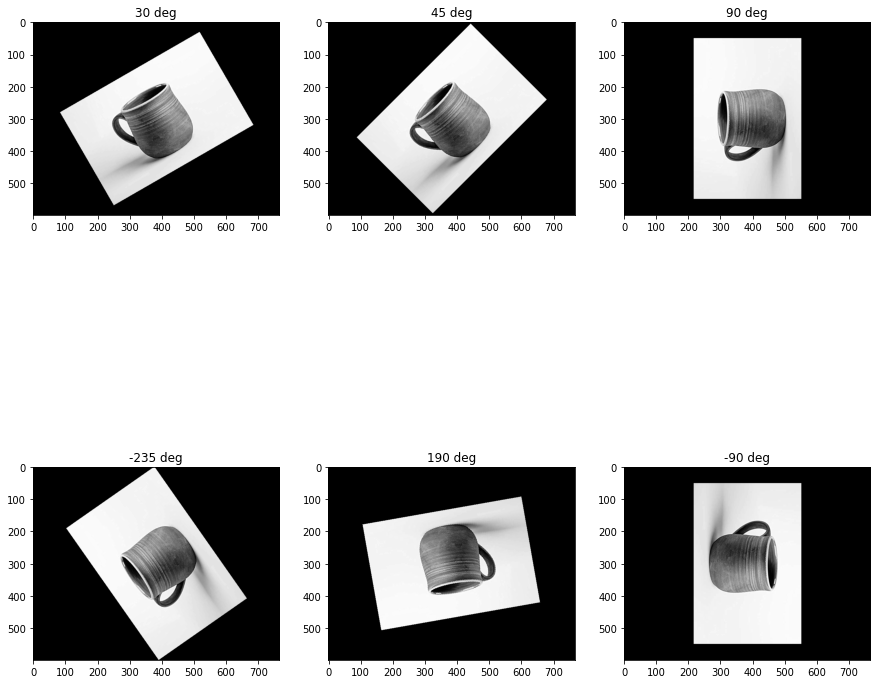

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(15,15))
axs[0][0].imshow(rot(cer,30),cmap='gray')
axs[0][0].title.set_text("30 deg")
axs[0][1].imshow(rot(cer,45),cmap='gray')
axs[0][1].title.set_text('45 deg')
axs[0][2].imshow(rot(cer,90),cmap='gray')
axs[0][2].title.set_text("90 deg")
axs[1][0].imshow(rot(cer,-235),cmap='gray')
axs[1][0].title.set_text('-235 deg')
axs[1][1].imshow(rot(cer,190),cmap='gray')
axs[1][1].title.set_text("190 deg")
axs[1][2].imshow(rot(cer,-90),cmap='gray')
axs[1][2].title.set_text('-90 deg')

The output boundary is taken such that we can accomotate 45 degrees i.e the digonal can be accomodated. Some additional buffer has been taken